# 파이썬으로 배우는 기초 통계와 통계 기반 데이터 분석
- 강사 : 백설희

## 통계학의 구조
- 통계학의 출발점과 끝점에는 모집단이 잇으며, 중간 과정에는 표본이 있음

**※ 모집단 전체의 전수조사가 불가한 경우가 많아 표본을 추출하여 표본통계량을 구하여, 모집단에 대한 통계적 추론을 한다..**

## 통계학의 정의
- 통계학이란 불확실한 상황에서 효과적인 의사결정을 할 수 있도록 과학적으로 자료를 수집하고, 정리하여 해석하는 이론과 방법을 연구하는 학문이다.
- 관심 또는 연구의 대상이 되는 모집단의 특성을 파악하기 위해 모집단부터 일부의 자료(표본)를 수집하고, 수집된 표본을 정리,요약,분석하여 표본의 특성을 파악한 후, 표본의 특성을 이용하여 모집단의 특성에 대해 추론하는 원리와 방법을 제공하는 학문

## 통계분석의 과정
- 수집 -> 정제 -> 추정 -> 검정
- 통계분석은 표본을 통해 의미 있는 자료를 추출하고, 이를 기반으로 의사결정, 확실성의 해소, 요약, 연관성 파악, 예측 등의 결과로 이어지도록 하는 일련의 과정

## 통계분석의 한계
- 확률이 없다면 의미가 없다.
  - 분석의 결과는 항상 확률과 연관되어 표현된다.
- 항상 틀릴 가능성을 내포한다.

##구글 드라이브 파일 연동

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 나의 루트 경로 설정
rootdir = '/content/drive/MyDrive/Colab Notebooks/통계'

In [ ]:
import seaborn as sns

import pandas as pd
import numpy as np
import os

tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

In [ ]:
# seaborn의 dataset 목록
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
taxis = pd.read_csv(os.path.join(rootdir, 'data', 'taxis.csv'))

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


#1. 수치형 데이터만 색인하여 num_data로 준비하라.

In [ ]:
# num_data = tips.select_dtypes(include='number')   # float64, int64
num_data = tips[['total_bill', 'tip', 'size']]

num_data.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


#2. 범주형 데이터만 색인하여 cat_data로 준비하라.

In [ ]:
# cat_data = tips.select_dtypes(exclude='number')
# cat_data = tips.select_dtypes(include='category')
cat_data = tips[['sex', 'smoker', 'day', 'time']]

cat_data.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [ ]:
# tips.describe()
tips.describe(include = 'number')
# tips.describe(include = 'category')
# tips.describe(include = 'all')

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
num_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
cat_data.describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [ ]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

<Axes: >

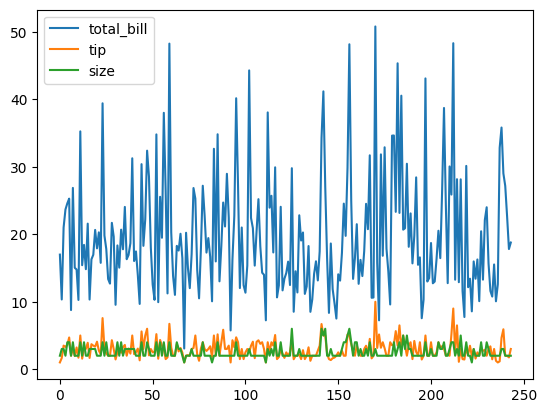

In [ ]:
num_data.plot()

In [ ]:
cat_data.columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

<Axes: xlabel='sex'>

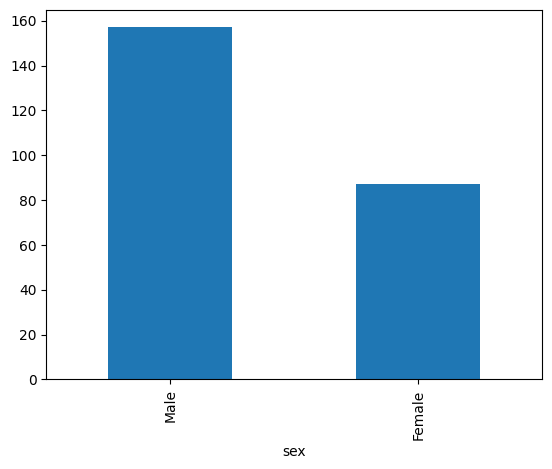

In [ ]:
# 범주형은 bar형으로 표시!
cat_data['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

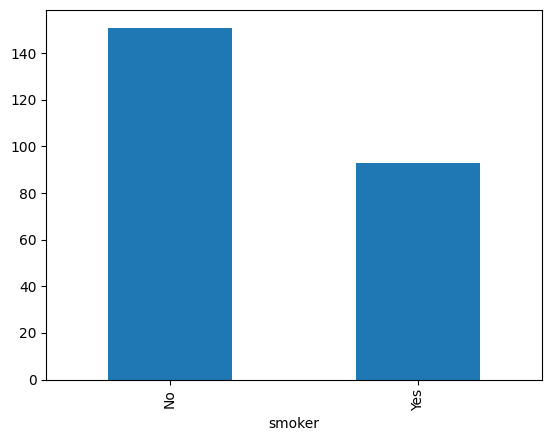

In [ ]:
# 범주형은 bar형으로 표시!
cat_data['smoker'].value_counts().plot(kind='bar')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#결측치 확인
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# 통계정보확인
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# tit_num_data = titanic.select_dtypes(include = 'number')
tit_num_data = titanic.select_dtypes(include = ['int64', 'float64'])

tit_num_data.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
# 수치형 데이터 - 상관관계 확인
tit_num_data.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

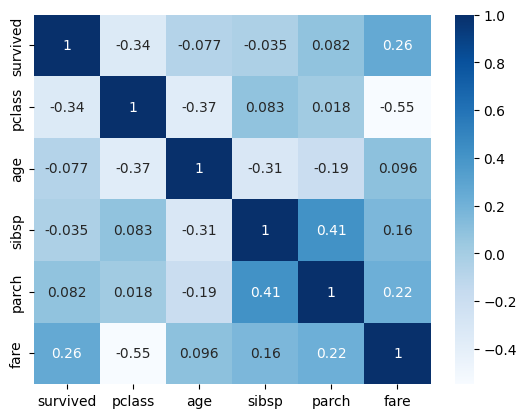

In [ ]:
import matplotlib.pyplot as plt

sns.heatmap(tit_num_data.corr(), annot=True, cmap='Blues')
#plt.show()

In [ ]:
tit_cat_data = titanic.select_dtypes(exclude = 'number')

tit_cat_data.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tit_num_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
tit_cat_data.columns

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
tit_cat_data['sex'].values_count()

AttributeError: 'Series' object has no attribute 'values_count'

### 1. 수치형 데이터는 num_titanic 으로 준비

In [ ]:
num_titanic = titanic.select_dtypes(include = ['int64', 'float64'])

num_titanic.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### 2. 범주형 데이터는 cat_titanic 으로 준비

In [ ]:
cat_titanic = titanic.select_dtypes(exclude = 'number')

cat_titanic.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


### 3. 수치형 데이터에 대해 빈도, 평균, 표준편차, 4분위수 확인

In [ ]:
num_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. 범주형 데이터에 대하여 값 별 빈도 확인

In [ ]:
cat_titanic.describe()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [ ]:
cat_titanic['sex'].value_counts()

,count
sex,
male,577
female,314


### 5. 수치형 데이터에 대한 시각화 (선그래프)

<Axes: >

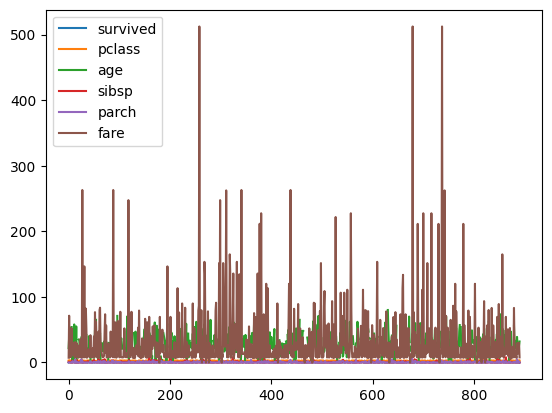

In [ ]:
num_titanic.plot()

### 6. 범주형 데이터에 대한 시각화 (막대그래프)

<Axes: xlabel='sex'>

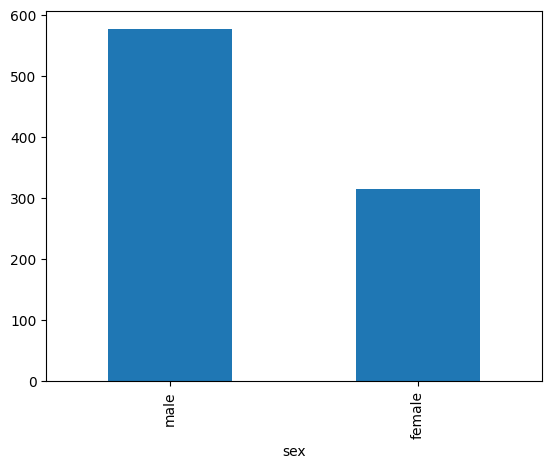

In [ ]:
cat_titanic['sex'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyth

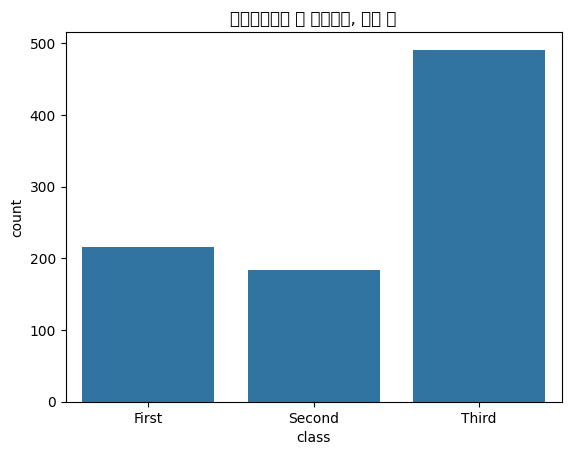

In [ ]:
sns.countplot(x="class", data=cat_titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

In [ ]:
titanic['class'].value_counts()

,count
class,
Third,491
First,216
Second,184


In [ ]:
titanic['sex'].value_counts()

,count
sex,
male,577
female,314


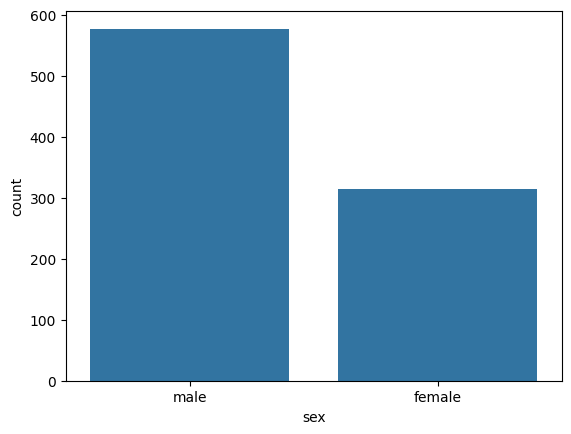

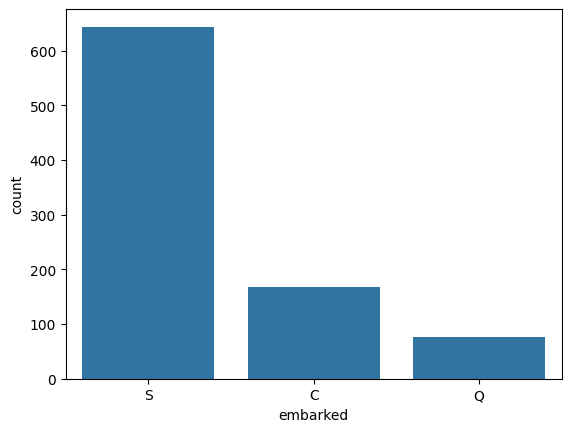

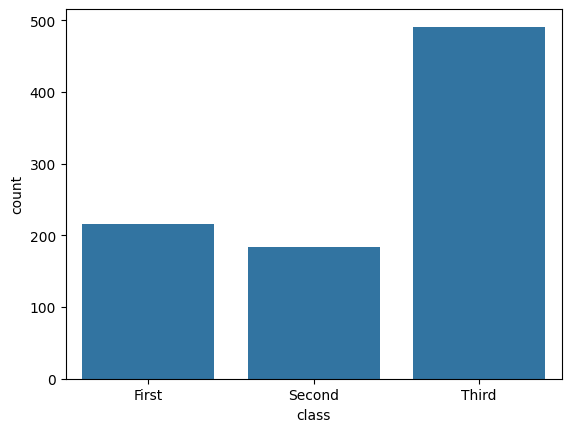

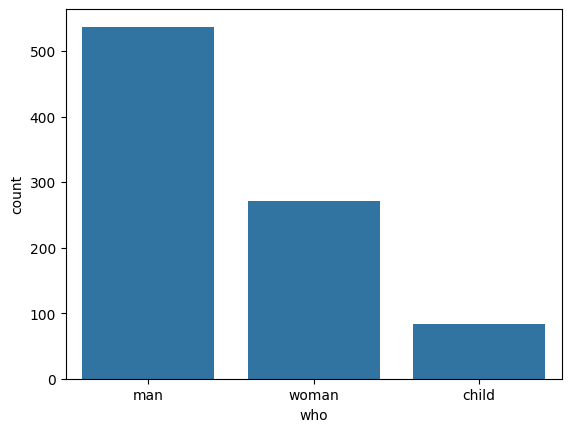

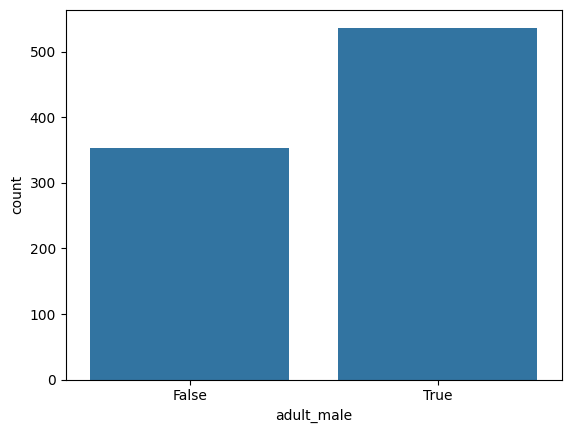

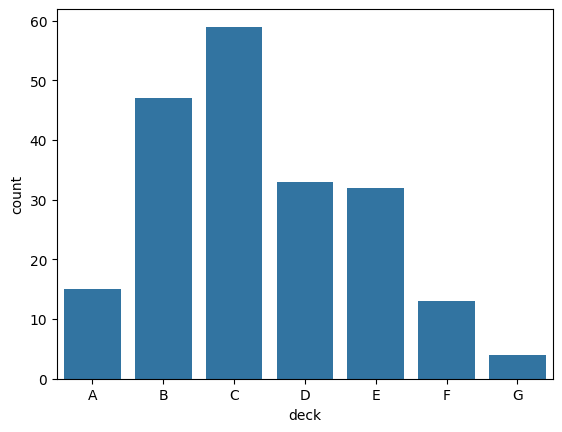

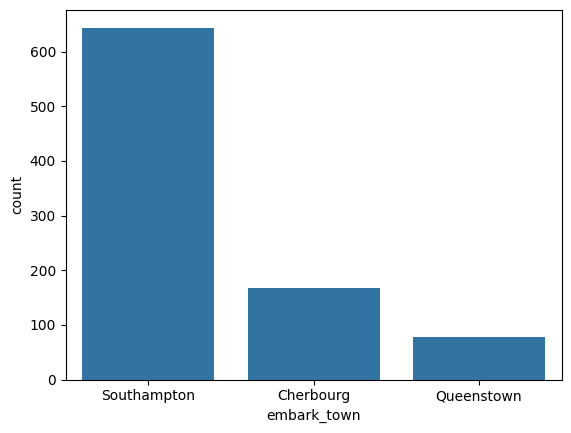

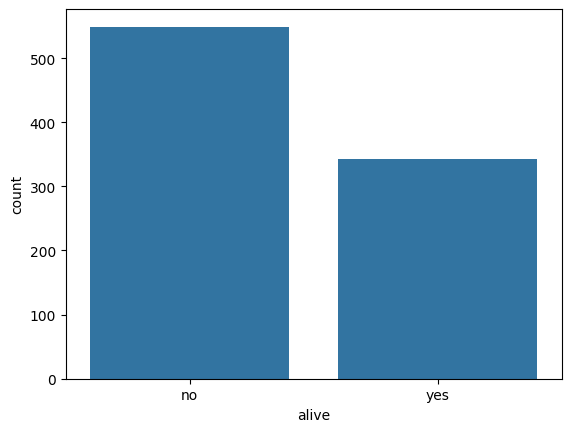

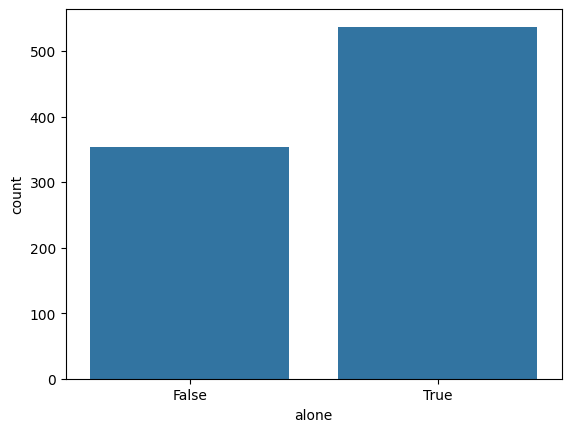

In [ ]:
for c in cat_titanic.columns:
  sns.countplot(x=c, data=cat_titanic)
  plt.show()

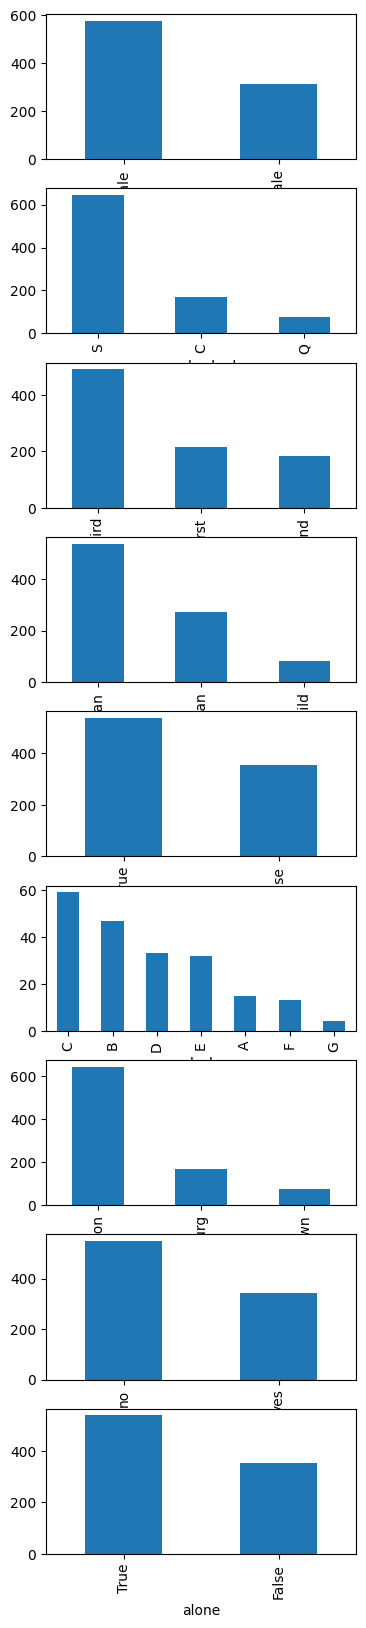

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(cat_titanic.columns), 1, figsize=(4,20))
for i, c in enumerate(cat_titanic.columns):
  cat_titanic[c].value_counts().plot(kind='bar', ax = ax[i])

plt.show()

# 올바른 데이터 타입의 중요성

In [ ]:
temp = ['20.0', '100.5', '-30']     # 문자열 자료형
np.sort(temp)

array(['-30', '100.5', '20.0'], dtype='<U5')

In [ ]:
f_temp = list(map(float, temp))

In [ ]:
np.sort(f_temp)

array([-30. ,  20. , 100.5])

In [ ]:
temp_s = pd.Series(temp, index = [1, 2, 3])
temp_s

,0
1,20.0
2,100.5
3,-30


In [ ]:
# temp_s.sort_index()
np.sort(temp_s)

array([-30. ,  20. , 100.5])

In [ ]:
temp_s.map(float)

,0
1,20.0
2,100.5
3,-30.0


In [ ]:
np.sort(temp_s.map(float))

array([-30. ,  20. , 100.5])

In [ ]:
taxis.head()

,Unnamed: 0,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
taxis_temp = taxis[['pickup', 'fare']].set_index('pickup')

In [ ]:
taxis_temp.head()

,fare
pickup,
2019-03-23 20:21:09,7.0
2019-03-04 16:11:55,5.0
2019-03-27 17:53:01,7.5
2019-03-10 01:23:59,27.0
2019-03-30 13:27:42,9.0


In [ ]:
taxis_temp

In [ ]:
taxis_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6433 entries, 2019-03-23 20:21:09 to 2019-03-13 19:31:22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fare    6433 non-null   float64
dtypes: float64(1)
memory usage: 100.5 KB


In [ ]:
taxis['pickup'] = pd.to_datetime( taxis['pickup'])
taxis['dropoff'] = pd.to_datetime( taxis['dropoff'])

In [ ]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       6433 non-null   int64         
 1   pickup           6433 non-null   datetime64[ns]
 2   dropoff          6433 non-null   datetime64[ns]
 3   passengers       6433 non-null   int64         
 4   distance         6433 non-null   float64       
 5   fare             6433 non-null   float64       
 6   tip              6433 non-null   float64       
 7   tolls            6433 non-null   float64       
 8   total            6433 non-null   float64       
 9   color            6433 non-null   object        
 10  payment          6389 non-null   object        
 11  pickup_zone      6407 non-null   object        
 12  dropoff_zone     6388 non-null   object        
 13  pickup_borough   6407 non-null   object        
 14  dropoff_borough  6388 non-null   object 

In [ ]:
taxis_temp = taxis[['pickup', 'fare']].set_index('pickup')

In [ ]:
taxis_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6433 entries, 2019-03-23 20:21:09 to 2019-03-13 19:31:22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fare    6433 non-null   float64
dtypes: float64(1)
memory usage: 100.5 KB


In [ ]:
taxis_temp.head()

,fare
pickup,
2019-03-23 20:21:09,7.0
2019-03-04 16:11:55,5.0
2019-03-27 17:53:01,7.5
2019-03-10 01:23:59,27.0
2019-03-30 13:27:42,9.0


In [ ]:
# pickup이 문자열인 경우에는 loc 인덱싱이 안됨..!
taxis_temp.loc['2019-03-23 20:21']

,fare
pickup,
2019-03-23 20:21:09,7.0


In [ ]:
taxis_2 = pd.read_csv(os.path.join(rootdir, 'data', 'taxis.csv')
, parse_dates = ['pickup', 'dropoff'])
taxis_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       6433 non-null   int64         
 1   pickup           6433 non-null   datetime64[ns]
 2   dropoff          6433 non-null   datetime64[ns]
 3   passengers       6433 non-null   int64         
 4   distance         6433 non-null   float64       
 5   fare             6433 non-null   float64       
 6   tip              6433 non-null   float64       
 7   tolls            6433 non-null   float64       
 8   total            6433 non-null   float64       
 9   color            6433 non-null   object        
 10  payment          6389 non-null   object        
 11  pickup_zone      6407 non-null   object        
 12  dropoff_zone     6388 non-null   object        
 13  pickup_borough   6407 non-null   object        
 14  dropoff_borough  6388 non-null   object 

In [ ]:
taxis_2[['pickup', 'fare']].set_index(['pickup'])['fare']

In [ ]:
rootdir

'/content/drive/MyDrive/Colab Notebooks/통계'

array([[[103, 116, 125],
        [103, 116, 125],
        [103, 116, 125],
        ...,
        [ 96, 109, 118],
        [ 96, 109, 118],
        [ 95, 108, 117]],

       [[103, 116, 125],
        [103, 116, 125],
        [103, 116, 125],
        ...,
        [ 96, 109, 118],
        [ 96, 109, 118],
        [ 96, 109, 118]],

       [[103, 116, 125],
        [103, 116, 125],
        [103, 116, 125],
        ...,
        [ 97, 110, 119],
        [ 96, 109, 118],
        [ 96, 109, 118]],

       ...,

       [[ 13,  18,  22],
        [ 14,  19,  23],
        [ 18,  21,  28],
        ...,
        [ 13,  16,  21],
        [ 13,  16,  21],
        [ 14,  17,  22]],

       [[ 12,  17,  21],
        [ 14,  19,  23],
        [ 18,  21,  28],
        ...,
        [ 13,  16,  21],
        [ 14,  17,  22],
        [ 13,  16,  21]],

       [[ 12,  17,  21],
        [ 14,  19,  23],
        [ 18,  21,  28],
        ...,
        [ 14,  17,  22],
        [ 14,  17,  22],
        [ 13,  16,  21]]], dtype=uint8)
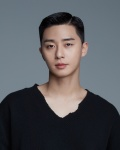

In [ ]:
park = plt.imread(os.path.join(rootdir, 'data', 'park.jpg'))
park # 가로 : 150, 세로 : 120, rgb : 3

In [ ]:
park[0,0,:]

array([103, 116, 125], dtype=uint8)

In [ ]:
park[[0],[0],[0]]

array([103], dtype=uint8)

In [ ]:
park[[1],[0],[0]]

array([103], dtype=uint8)

In [ ]:
park[[2],[0],[0]]

array([103], dtype=uint8)